### Team members: Kiran Prabhakar, Shishir Suvarna
### UBIT Name: shishirs
### Person Number: 50290573
### Team mate UBIT Name: kprabhak
### Team mate Person Number: 50287403

## PART 2:

## Task 4:
## Chart 1: Influenza Positive Tests Reported to CDC by U.S. Clinical laboratories, National Summary, 2018-2019 Season
#### Replicating graph as shown on CDC website  till 4th week of 2019.

In [2]:
options(warn=-1) # Excludes the warnings

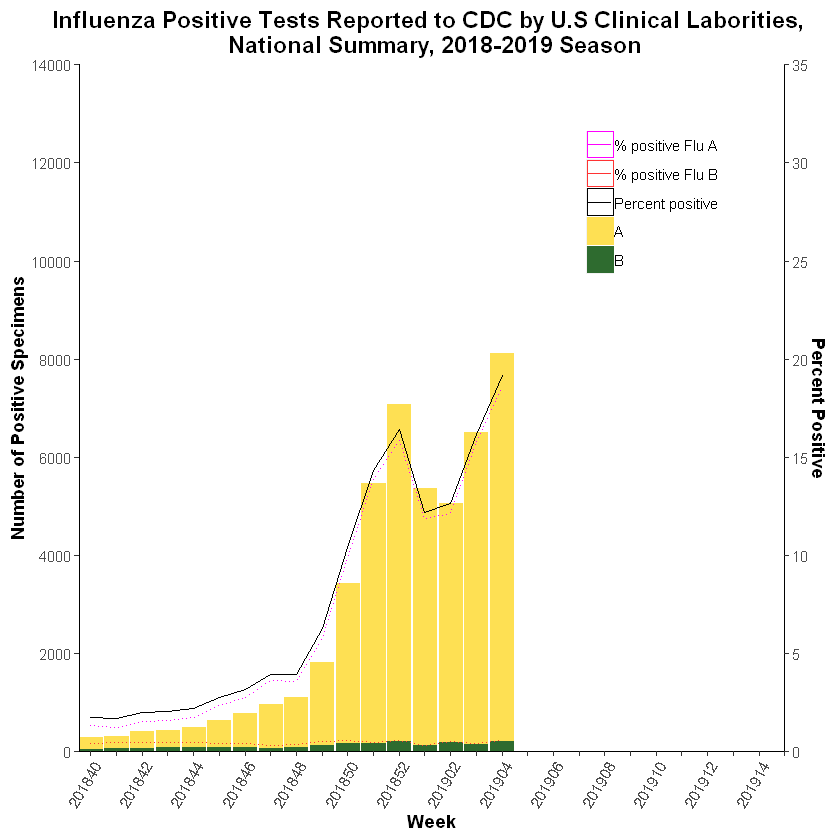

In [3]:
# Graph1
library(reshape2)
library(ggplot2)
clinicalLabs <- read.csv('Graph1.csv', skip =1)
clinicalLabs <- clinicalLabs[which((clinicalLabs$WEEK >= 40 & clinicalLabs$YEAR == 2018) | (clinicalLabs$WEEK <= 4 & clinicalLabs$YEAR == 2019)), ]
dummy_data <- data.frame('REGION.TYPE' ='National', 'REGION' = 'X', 'YEAR' = 2019,  'WEEK' = c(5:15), 'TOTAL.SPECIMENS'= NA, 'TOTAL.A'= NA, 'TOTAL.B'=NA, 'PERCENT.POSITIVE'=NA, 'PERCENT.A'=NA, 'PERCENT.B'=NA) #'National', 'X', 2019, c(9:18), 0,0,0,0,0,0 )

clinicalLabs <- rbind(clinicalLabs, dummy_data)
dfm_clinical_bar <- melt(clinicalLabs[,c('WEEK', 'TOTAL.A', 'TOTAL.B', 'PERCENT.POSITIVE', 'PERCENT.A', 'PERCENT.B')],id.vars = 1)
dfm_clinical_bar$WEEK <- factor(dfm_clinical_bar$WEEK, levels = dfm_clinical_bar[which(dfm_clinical_bar$variable == 'TOTAL.A'), ]$WEEK)
percent_positive <- dfm_clinical_bar[which(dfm_clinical_bar$variable == 'PERCENT.POSITIVE'), ]
percent_positive$value <- percent_positive$value/0.0025
percent_A <- dfm_clinical_bar[which(dfm_clinical_bar$variable == 'PERCENT.A'), ]
percent_A$value <- percent_A$value/0.0025
percent_B <- dfm_clinical_bar[which(dfm_clinical_bar$variable == 'PERCENT.B'), ]
percent_B$value <- percent_B$value/0.0025

line_data <- dfm_clinical_bar[which(dfm_clinical_bar$variable == 'PERCENT.POSITIVE' | dfm_clinical_bar$variable == 'PERCENT.A' | dfm_clinical_bar$variable == 'PERCENT.B'), ]
line_data$value <- line_data$value/ 0.0025

week_below_10 <-  clinicalLabs[which(clinicalLabs$WEEK < 10), ]$WEEK
week_below_10 <- paste("0", week_below_10, sep="")
clinicalLabs[which(clinicalLabs$WEEK < 10), ]$WEEK <- week_below_10
labels_X <- gsub(" ", "", paste(clinicalLabs$YEAR, clinicalLabs$WEEK), fixed = TRUE)

labels_X <- labels_X[seq(1, length(labels_X), 2)]
labels_X_modified <- c()
for (label in labels_X) {
  labels_X_modified <- c(labels_X_modified, c(label," "))
}

bar_data <- dfm_clinical_bar[which(dfm_clinical_bar$variable =='TOTAL.A' | dfm_clinical_bar$variable =='TOTAL.B'), ]
legend_labels <- c("TOTAL.A" = "A", "TOTAL.B" = "B", "PERCENT.A" = "% positive Flu A", "PERCENT.B" = "% positive Flu B", "PERCENT.POSITIVE" = "Percent positive")
bargraph_colors <- c("TOTAL.A" = "#FEE053", "TOTAL.B" = "#2E6B2F", "PERCENT.A" = "#FFFFFF", "PERCENT.B" = "#FFFFFF", "PERCENT.POSITIVE" = "#FFFFFF")
linegraph_colors <- c("TOTAL.A" = "#FEE053", "TOTAL.B" = "#2E6B2F", "PERCENT.B" = "#ff3333", "PERCENT.A" = "#ff00ff", "PERCENT.POSITIVE" = "#000000")
ggplot(dfm_clinical_bar,  aes(x = WEEK,y = value, group = variable, fill = variable, colour=variable))+ 
geom_bar(data =bar_data, stat = "identity")+
geom_line( data = percent_positive)+
geom_line( linetype = "dotted", data = percent_A)+
geom_line( linetype = "dotted", data = percent_B)+
 
  scale_color_manual(values=linegraph_colors, labels= legend_labels)+
 
  scale_fill_manual( values = bargraph_colors, labels= legend_labels)+
  
scale_y_continuous(sec.axis = sec_axis(~.*0.0025, name = "Percent Positive", breaks = seq(0,35, by=5)),  
                   limits = c(0, 14000), breaks = seq(0,14000, by=2000), expand = c(0, 0))+
  labs(title = "Influenza Positive Tests Reported to CDC by U.S Clinical Laborities, \n National Summary, 2018-2019 Season", y = "Number of Positive Specimens", x = "Week", linetype = "My Line Name")+
  theme(axis.line = element_line(colour = "#000000", linetype = "solid",size = 0.4),
        panel.background = element_rect(fill = 'white', colour = 'black'))+
  scale_x_discrete(labels = labels_X_modified, expand = c(0, 0))+
  theme(axis.text.x = element_text(angle = 60, hjust = 1),
        plot.title = element_text(hjust=0.5, face="bold", size=14),
        axis.title.x = element_text(face="bold"),
        axis.title.y = element_text(face="bold"),
        legend.position = c(0.82,0.8), legend.title = element_blank())

### Chart 2: Influenza Positive Tests Reported to CDC by U.S. Public Health Laboratories, National Summary, 2018-2019 Season
#### Replicating graph as shown on CDC website till 4th week of 2019.

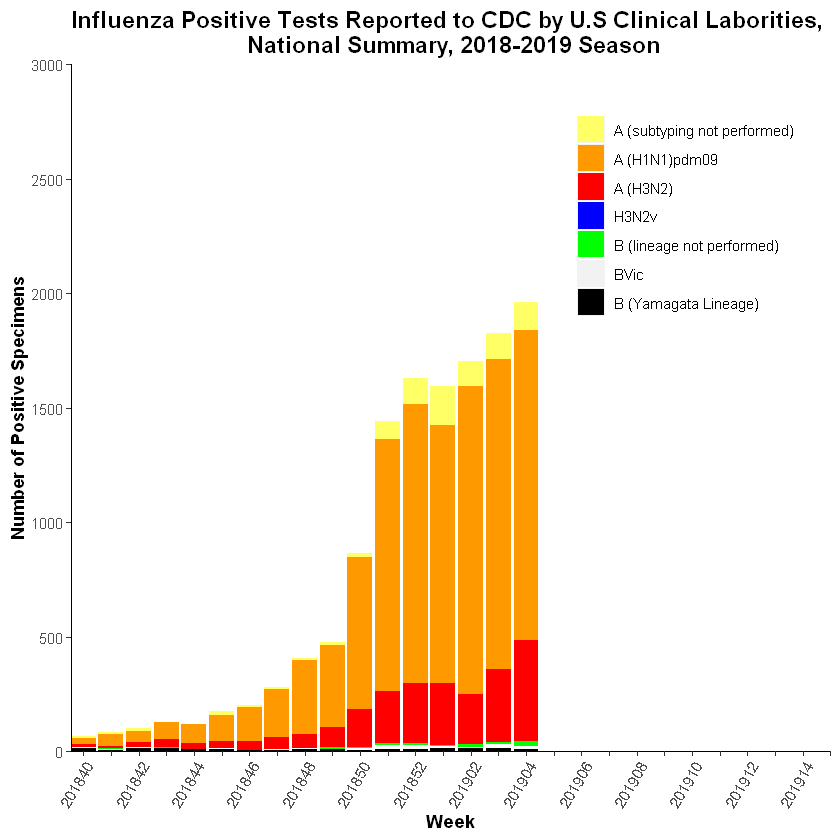

In [4]:
# Graph2
library(ggplot2)
library(reshape2)
publicData <- read.csv('Graph2.csv', skip = 1)
publicData <- publicData[which((publicData$WEEK >= 40 & publicData$YEAR == 2018) | (publicData$WEEK <= 4 & publicData$YEAR == 2019)), ]
dummy_data <- data.frame('REGION.TYPE'=NA, 'REGION'=NA, 'YEAR'=2019, 'WEEK'=c(5:15), 'TOTAL.SPECIMENS'=NA, 'A..2009.H1N1.'=NA, 'A..H3.'=NA, 'A..Subtyping.not.Performed.'=NA, 'B'=NA, 'BVic'=NA, 'BYam'=NA, 'H3N2v'=NA)
publicData <- rbind(publicData, dummy_data)
week_below_10 <-  publicData[which(publicData$WEEK < 10), ]$WEEK
week_below_10 <- paste("0", week_below_10, sep="")
publicData[which(publicData$WEEK < 10), ]$WEEK <- week_below_10
labels_X <- gsub(" ", "", paste(publicData$YEAR, publicData$WEEK), fixed = TRUE)
publicData_2018 <- publicData[which(publicData$YEAR == 2018 & publicData$WEEK >= 40), ]
publicData_2019 <- publicData[which(publicData$YEAR == 2019), ]
filtered_data <- rbind(publicData_2018,publicData_2019)

filtered_data$WEEK = factor(filtered_data$WEEK, levels=filtered_data$WEEK)
labels_X <- gsub(" ", "", paste(filtered_data$YEAR, filtered_data$WEEK), fixed = TRUE)
labels_X <- labels_X[seq(1, length(labels_X), 2)]
labels_X_modified <- c()
for (label in labels_X) {
  labels_X_modified <- c(labels_X_modified, c(label," "))
}


dfm <- melt(filtered_data[,c('WEEK', 'A..Subtyping.not.Performed.', 
                          'A..2009.H1N1.', 'A..H3.', 'H3N2v', 'B', 'BVic', 'BYam')],id.vars = 1)
legend_labels <- c("A..Subtyping.not.Performed." = "A (subtyping not performed)",
                   "A..2009.H1N1." = "A (H1N1)pdm09",
                   "A..H3." = "A (H3N2)", 
                   "H3N2v" = "H3N2v", 
                   "B" = "B (lineage not performed)",
                   "Bvic" = "B (Victoria Lineage)",
                   "BYam" = "B (Yamagata Lineage)")
legend_colors <- c("A..Subtyping.not.Performed." = "#ffff66",
                   "A..2009.H1N1." = "#ff9900",
                   "A..H3." = "#ff0000", 
                   "H3N2v" = "blue", 
                   "B" = "green",
                   "Bvic" = "pink",
                   "BYam" = "black")
ggplot(dfm,aes(x = WEEK,y = value)) + 
  geom_bar(aes(fill = variable),stat = "identity",position =position_stack(reverse = FALSE))+
  labs(title = "Influenza Positive Tests Reported to CDC by U.S Clinical Laborities, \n National Summary, 2018-2019 Season", y = "Number of Positive Specimens", x = "Week", linetype = "My Line Name")+
  theme(panel.background = element_rect(fill = 'white', colour = 'black'))+
  scale_x_discrete(labels = labels_X_modified, expand = c(0, 0))+
  scale_y_continuous(limits = c(0, 3000), breaks = seq(0,3000, by=500), expand = c(0, 0))+
  theme(axis.text.x = element_text(angle = 60, hjust = 1))+
  scale_fill_manual(values = legend_colors, labels= legend_labels)+
  theme(axis.line = element_line(colour = "#000000", linetype = "solid",size = 0.4),
        axis.text.x = element_text(angle = 60, hjust = 1),
        plot.title = element_text(hjust=0.5, face="bold", size=14),
        axis.title.x = element_text(face="bold"),
        axis.title.y = element_text(face="bold"),
        legend.position = c(0.82,0.8))+
  guides(fill=guide_legend(title=""))

### Chart 3: Percentage of visits for Influenza-like Illness (ILI) reported by the U.S. Outpatient Influenza-like Illness Surveillance Network (ILINet), Weekly National Summary, 2018-2019 and Selected Previous Seasons
#### Replicating graph for all the seasons as shown on CDC website. The graph is drawn for selected seasons till 4th week of 2019


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



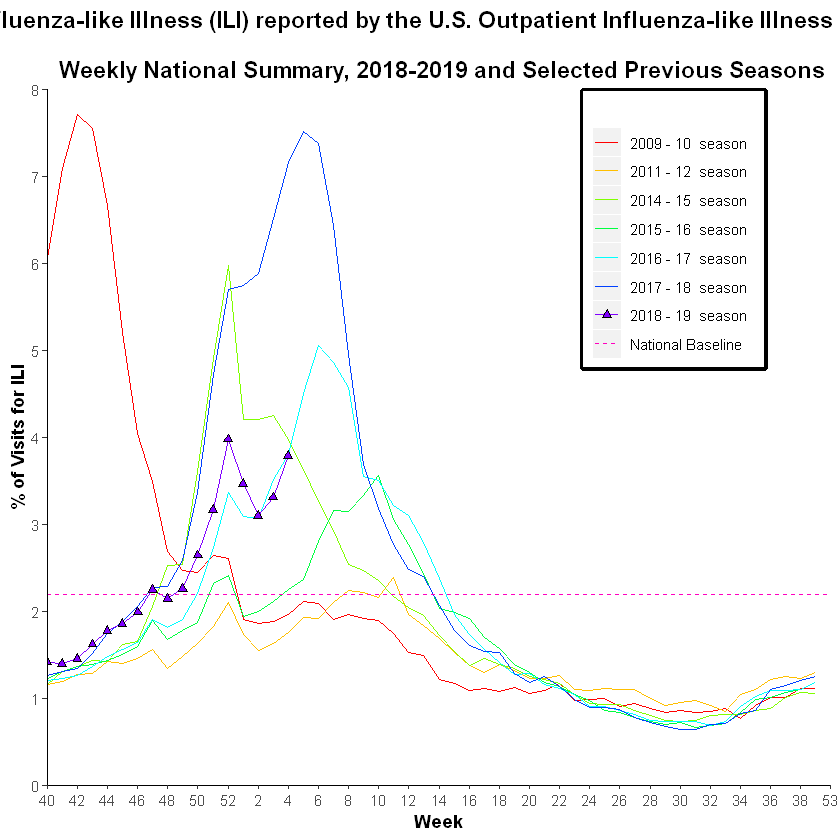

In [5]:
# Graph3

library(dplyr)
library(stringr)
out_patient_data <- read.csv('Graph3.csv', skip = 1)
df <- out_patient_data[, c('X..WEIGHTED.ILI','WEEK', 'YEAR')]
df$WEEK <- factor(df$WEEK, levels = unique(df$WEEK[match(40,df$WEEK): length(df$WEEK)]), ordered = TRUE)
years <- sort(unique(df$YEAR))

# Preparing the data
i<-1
data_total <- data.frame()
while (i < length(years)) {
  if(years[i] == 2010 ||years[i] == 2012 || years[i] == 2013) { i = i+1; next;}
  if(i +1 > length(years)) break;
  data_temp1 <- df[which((df$YEAR == years[i] & df$WEEK >=40 & df$WEEK <= 52)), ]
  data_temp2 <- df[which((df$YEAR == years[i+1]& df$WEEK >= 1 & df$WEEK != 53)), ] 
    if(years[i+1] == 2019){
        data_temp2 <- df[which((df$YEAR == years[i+1]& df$WEEK >= 1 & df$WEEK <= 4)), ] 
    }
  
  data_temp <- rbind(data_temp1, data_temp2)
  data_temp$season <- paste(str_trim(toString(years[i])), "-", str_trim(toString(years[i+1] - 2000)), " season")
  data_total <- rbind(data_total, data_temp)
  i = i+1
}

national_baseline <- data.frame("WEEK" = df$WEEK, 'X..WEIGHTED.ILI' = 2.2, 'YEAR'=2019, 'season' = 'National Baseline' )
data_total <- rbind(data_total, national_baseline)


# Plotting the graph


plot <- ggplot(data=data_total, aes(x = data_total$WEEK, y = data_total$X..WEIGHTED.ILI,
                                    fill = data_total$season, shape = data_total$season,
                                    linetype = data_total$season))+
        geom_line(data=data_total, aes(color=data_total$season, group = data_total$season))+
        geom_point(data = data_total[which(data_total$season == '2018-19 season'), ])+
        scale_colour_manual(name = "", values = rainbow(8), guide = "legend")+
        scale_fill_manual(name = "", values = rainbow(8), guide = "legend")+
        scale_shape_manual(name = "", values = c(NA, NA, NA, NA, NA, NA,
                                                          24, NA), guide = "legend")+
        scale_linetype_manual(name = "", values = c("solid", "solid", "solid",
                                                     "solid", "solid", "solid", "solid", "dashed")
                                        , guide = "legend")+
        scale_y_continuous(limits = c(0, 8), breaks = seq(0, 8, by = 1),
                     name = "% of Visits for ILI", expand = c(0, 0))+
        scale_x_discrete("Week", breaks = levels(data_total$WEEK)[c(T,F)], expand = c(0, 0))+
        labs(title = "Percentage of visits for Influenza-like Illness (ILI) reported by the U.S. Outpatient Influenza-like Illness Surveillance Network (ILINet),
             \n Weekly National Summary, 2018-2019 and Selected Previous Seasons")+
        theme(axis.line = element_line(colour = "#000000", linetype = "solid",size = 0.4),
              legend.box.background = element_rect(fill = 'white', colour = "black", size=2),
        panel.background = element_rect(fill = 'white', colour = 'black'),
        plot.title = element_text(hjust=0.5, face="bold", size=14),
        axis.title.x = element_text(face="bold"),
        axis.title.y = element_text(face="bold"),
        legend.position = c(0.8,0.8))
plot


### Chart 4: Number of Influenza-Associated Pediatric Deaths by Week of Death: 2015-2016 to present
####  Replicating graph as shown on CDC website. If the graph is drawn only till the 4th week of 2019, the blue lines are missing and will not be similar to what appear in the CDC site. So, the graph is drawn without modifying the data.

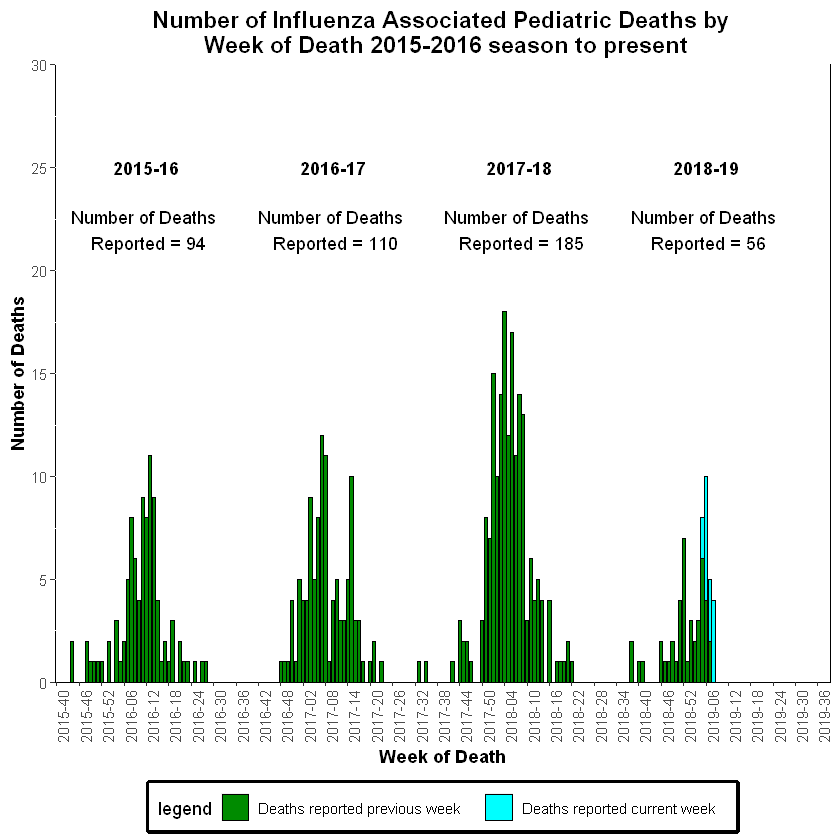

In [5]:
# Graph4

library(ggplot2)
library(reshape2)
library(dplyr)
library(shiny)
ped_death <- read.csv('Graph4.csv', skip = 1)

levels_data <- levels(ped_death$WEEK.NUMBER)[c(T,F,F,F,F,F)]
labels_X <- c()
for (label in levels_data) {
  labels_X <- c(labels_X, c(label,":"))
}
sum <- aggregate(ped_death$NO..OF.DEATHS, by = list(Category=ped_death$SEASON), FUN=sum)
deaths <- sum$x
category <- sum$Category

dfm <- melt(ped_death[,c('WEEK.NUMBER', 'PREVIOUS.WEEK.DEATHS', 'CURRENT.WEEK.DEATHS')],id.vars = 1)
dfm$legend = dfm$variable
ggplot(dfm) + 
  geom_bar(aes(x = WEEK.NUMBER,y = value, fill = legend), colour="black", stat = "identity",position =position_stack(reverse = TRUE))+
  scale_x_discrete(breaks = labels_X, labels = labels_X, expand=c(0,0))+
  theme(axis.text.x = element_text(angle = 90, hjust = 1))+
  scale_y_continuous(breaks =seq(from = 0, to = 30, by = 5), expand=c(0,0))+
  coord_cartesian(ylim=c(0,30))+
  scale_fill_manual(labels = c("Deaths reported previous week", "Deaths reported current week"),values = c(PREVIOUS.WEEK.DEATHS= 'green4',CURRENT.WEEK.DEATHS = 'cyan' ))+
  
  labs( title = "Number of Influenza Associated Pediatric Deaths by \n Week of Death 2015-2016 season to present",  color = "Legend Title\n") + xlab("Week of Death") + ylab("Number of Deaths")+
  theme(legend.box.background = element_rect(fill = 'white', colour = "black", size=2), panel.background = element_rect(fill = 'white', colour = 'black'), legend.position='bottom',
        plot.title = element_text(hjust=0.5, face="bold", size=14),
        axis.title.x = element_text(face="bold"),
        axis.title.y = element_text(face="bold"))+
  annotate("text", x = 25, y = 25, label = paste(category[1]), fontface ='bold')+
  annotate("text", x = 25, y = 22, label = paste("Number of Deaths \n Reported =", deaths[1]))+
  annotate("text", x = 75, y = 25, label = paste( category[2]), fontface ='bold')+
  annotate("text", x = 75, y = 22, label = paste("Number of Deaths \n Reported =", deaths[2]))+
  annotate("text", x = 125, y = 25, label = paste(category[3]), fontface ='bold')+
  annotate("text", x = 125, y = 22, label = paste("Number of Deaths \n Reported =", deaths[3]))+
  annotate("text", x = 175, y = 25, label = paste(category[4]), fontface ='bold')+
  annotate("text", x = 175, y = 22, label = paste("Number of Deaths \n Reported =", deaths[4]))


### Chart 5: A Weekly Influenza Surveillance Report Prepared by the Influenza Division Influenza-Like Illness (ILI) Activity Level Indicator Determined by Data Reported to ILINet
#### Averaged the ILI Activity level  and plotted it on a heat map. Collected data from 2018 Week 40 to 2019 Week 4, .

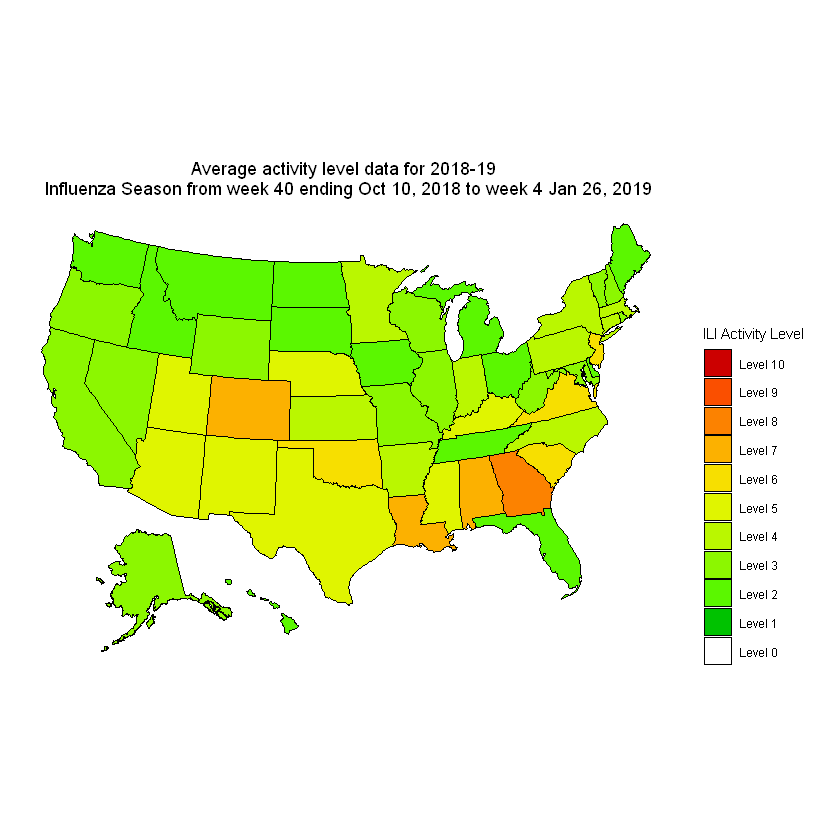

In [6]:
# Graph5
library(usmap)
library(ggplot2)
library(dplyr)
heatmapData <- read.csv('Graph5.csv')
heatmapData <- heatmapData[grep("Level ", heatmapData$ACTIVITY.LEVEL),]
heatmapData$LevelInt <- as.integer(substr(heatmapData$ACTIVITY.LEVEL, 7, 9))
agreegated_data <- aggregate(heatmapData, by = list(heatmapData$STATENAME), FUN = mean)
agreegated_data$LevelInt <- ceiling(agreegated_data$LevelInt)
agreegated_data$LevelInt <- paste("Level", agreegated_data$LevelInt)

code <- fips(agreegated_data[, c('Group.1')])
value <- agreegated_data$LevelInt
df <- data.frame("fips" = code, "LevelInt" = value)
pal <- c(
  "Level 10" = "#CC0000",
  "Level 9" = "#FA4F00",
  "Level 8" = "#FC8200",
  "Level 7" = "#FCB100",
  "Level 6" = "#F7DF00",
  "Level 5" = "#E0F500",
  "Level 4" = "#BAF700",
  "Level 3" = "#8CF700",
  "Level 2" = "#5BF700",
  "Level 1" = "#00C200",
  "Level 0" = "#ffffff"
  
)   
plot_usmap(data = df, values = "LevelInt", lines = "black")+
  scale_fill_manual(values = pal, limits = names(pal), name='ILI Activity Level')+
  labs(title = "Average activity level data for 2018-19 \n Influenza Season from week 40 ending Oct 10, 2018 to week 4 Jan 26, 2019")+
  theme(legend.position = "right", plot.title = element_text(hjust=0.5))


## Task 5:

### Influenza Positive Tests Reported to CDC by U.S. Clinical laboratories, National Summary
#### Redrawing the graph for 52 weeks starting from 04th week of 2018 to 04th week of 2019

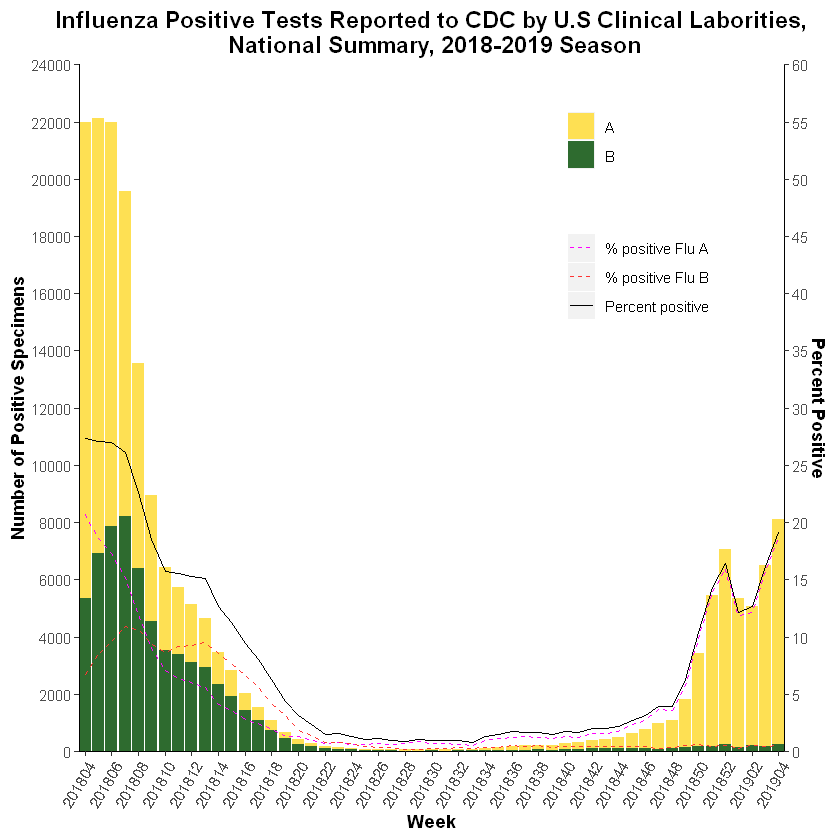

In [7]:
# Graph6

library(reshape2)
library(ggplot2)
clinicalLabs <- read.csv('Graph6.csv', skip =1)
clinicalLabs <- clinicalLabs[which((clinicalLabs$WEEK >= 4 & clinicalLabs$YEAR == 2018) | (clinicalLabs$WEEK <= 4 & clinicalLabs$YEAR == 2019)), ]

week_below_10 <-  clinicalLabs[which(clinicalLabs$WEEK < 10), ]$WEEK
week_below_10 <- paste("0", week_below_10, sep="")
clinicalLabs[which(clinicalLabs$WEEK < 10), ]$WEEK <- week_below_10
labels_X <- gsub(" ", "", paste(clinicalLabs$YEAR, clinicalLabs$WEEK), fixed = TRUE)

labels_X <- labels_X[seq(1, length(labels_X))]

clinicalLabs$XLabels = factor(labels_X, levels = labels_X)


dfm_clinical_bar <- melt(clinicalLabs[,c('XLabels', 'TOTAL.A', 'TOTAL.B', 'PERCENT.POSITIVE', 'PERCENT.A', 'PERCENT.B')],id.vars = 1)
#dfm_clinical_bar$WEEK <- factor(dfm_clinical_bar$WEEK, levels = dfm_clinical_bar[which(dfm_clinical_bar$variable == 'TOTAL.A'), ]$WEEK)
percent_positive <- dfm_clinical_bar[which(dfm_clinical_bar$variable == 'PERCENT.POSITIVE'), ]
percent_positive$value <- percent_positive$value/0.0025
percent_A <- dfm_clinical_bar[which(dfm_clinical_bar$variable == 'PERCENT.A'), ]
percent_A$value <- percent_A$value/0.0025
percent_B <- dfm_clinical_bar[which(dfm_clinical_bar$variable == 'PERCENT.B'), ]
percent_B$value <- percent_B$value/0.0025

line_data <- dfm_clinical_bar[which(dfm_clinical_bar$variable == 'PERCENT.POSITIVE' | dfm_clinical_bar$variable == 'PERCENT.A' | dfm_clinical_bar$variable == 'PERCENT.B'), ]
line_data$value <- line_data$value/ 0.0025


bar_data <- dfm_clinical_bar[which(dfm_clinical_bar$variable =='TOTAL.A' | dfm_clinical_bar$variable =='TOTAL.B'), ]

legend_labels <- c("TOTAL.A" = "A", "TOTAL.B" = "B", "PERCENT.A" = "% positive Flu A", "PERCENT.B" = "% positive Flu B", "PERCENT.POSITIVE" = "Percent positive")
bargraph_colors <- c("TOTAL.A" = "#FEE053", "TOTAL.B" = "#2E6B2F", "PERCENT.A" = "#FFFFFF", "PERCENT.B" = "#FFFFFF", "PERCENT.POSITIVE" = "#FFFFFF")
linegraph_colors <- c("TOTAL.A" = "transparent", "TOTAL.B" = "transparent", "PERCENT.B" = "#ff3333", "PERCENT.A" = "#ff00ff", "PERCENT.POSITIVE" = "#000000")
types <-  c("TOTAL.A" = "blank", "TOTAL.B" = "blank", "PERCENT.A" = "dashed", "PERCENT.B" = "dashed", "PERCENT.POSITIVE" = "solid")

ggplot(mapping = aes(x = XLabels,y = value))+ #, group = variable, fill = variable, colour=variable))+ 
geom_bar(data =bar_data, aes(fill = variable),stat = "identity")+
geom_line( data = percent_positive, aes(group = variable, colour=variable, linetype = variable))+
geom_line( data = percent_A, aes(group = variable, colour=variable, linetype = variable))+
geom_line( data = percent_B, aes(group = variable, colour=variable, linetype = variable))+

scale_color_manual(name = "", values=linegraph_colors, labels= legend_labels, guide = "legend")+
scale_fill_manual(name = "", values = bargraph_colors, labels= legend_labels, guide = "legend")+
scale_linetype_manual(name = "", values = types, labels = legend_labels, guide = "legend")+

scale_y_continuous(sec.axis = sec_axis(~.*0.0025, name = "Percent Positive", breaks = seq(0,100, by=5)),  
                   limits = c(0, 24000), breaks = seq(0,24000, by=2000), expand = c(0, 0))+
  labs(title = "Influenza Positive Tests Reported to CDC by U.S Clinical Laborities,\n National Summary, 2018-2019 Season", y = "Number of Positive Specimens", x = "Week")+
  theme(axis.line = element_line(colour = "#000000", linetype = "solid",size = 0.4),
        panel.background = element_rect(fill = 'white', colour = 'black'))+
  scale_x_discrete(breaks = levels(clinicalLabs$XLabels)[c(T, F)], expand = c(0, 0))+
  theme(axis.text.x = element_text(angle = 60, hjust = 1),
        plot.title = element_text(hjust=0.5, face="bold", size=14),
        axis.title.x = element_text(face="bold"),
        axis.title.y = element_text(face="bold"),
        legend.position = c(0.8,0.8))

### Influenza Positive Tests Reported to CDC by U.S. Public Health Laboratories, National Summary
#### Redrawing the graph for 52 weeks starting from 04th week of 2018 to 04th week of 2019

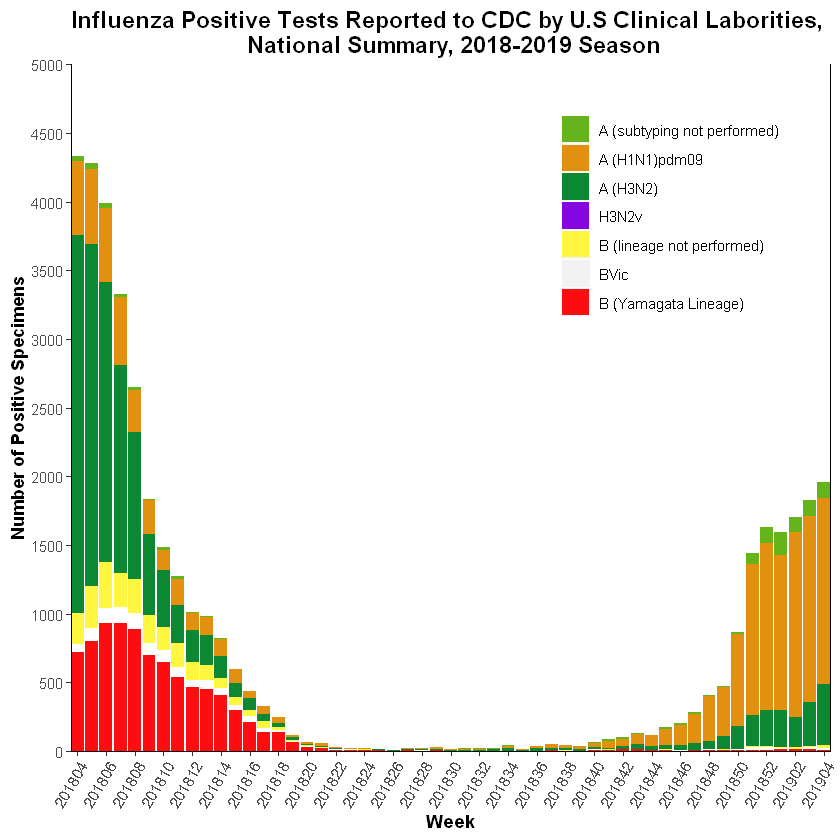

In [8]:
# Graph7
library(ggplot2)
library(reshape2)
publicData <- read.csv('Graph7.csv', skip = 1)
publicData <- publicData[which((publicData$WEEK >= 4 & publicData$YEAR == 2018) | (publicData$WEEK <= 4 & publicData$YEAR == 2019)), ]

week_below_10 <-  publicData[which(publicData$WEEK < 10), ]$WEEK
week_below_10 <- paste("0", week_below_10, sep="")
publicData[which(publicData$WEEK < 10), ]$WEEK <- week_below_10
labels_X <- gsub(" ", "", paste(publicData$YEAR, publicData$WEEK), fixed = TRUE)

labels_X <- labels_X[seq(1, length(labels_X))]

publicData$XLabels = factor(labels_X, levels = labels_X)



dfm <- melt(publicData[,c('XLabels', 'A..Subtyping.not.Performed.', 
                          'A..2009.H1N1.', 'A..H3.', 'H3N2v', 'B', 'BVic', 'BYam')],id.vars = 1)
legend_labels <- c("A..Subtyping.not.Performed." = "A (subtyping not performed)",
                   "A..2009.H1N1." = "A (H1N1)pdm09",
                   "A..H3." = "A (H3N2)", 
                   "H3N2v" = "H3N2v", 
                   "B" = "B (lineage not performed)",
                   "Bvic" = "B (Victoria Lineage)",
                   "BYam" = "B (Yamagata Lineage)")
legend_colors <- c("A..Subtyping.not.Performed." = "#66B41B",
                   "A..2009.H1N1." = "#E29010",
                   "A..H3." = "#0C8833", 
                   "H3N2v" = "#8606DF", 
                   "B" = "#FFF73F",
                   "Bvic" = "#C3F71E",
                   "BYam" = "#FC0D0F")
ggplot(dfm,aes(x = XLabels,y = value)) + 
  geom_bar(aes(fill = variable),stat = "identity")+
  labs(title = "Influenza Positive Tests Reported to CDC by U.S Clinical Laborities, \n National Summary, 2018-2019 Season", y = "Number of Positive Specimens", x = "Week", linetype = "My Line Name")+
  theme(panel.background = element_rect(fill = 'white', colour = 'black'))+
  scale_x_discrete(breaks = levels(dfm$XLabels)[c(T, F)], expand = c(0, 0))+
  scale_y_continuous(limits = c(0, 5000), breaks = seq(0,5000, by=500), expand = c(0, 0))+
  theme(axis.text.x = element_text(angle = 60, hjust = 1))+
  scale_fill_manual(values = legend_colors, labels= legend_labels)+
  theme(axis.line = element_line(colour = "#000000", linetype = "solid",size = 0.4),
        axis.text.x = element_text(angle = 60, hjust = 1),
        plot.title = element_text(hjust=0.5, face="bold", size=14),
        axis.title.x = element_text(face="bold"),
        axis.title.y = element_text(face="bold"),
        legend.position = c(0.8,0.8))+
  guides(fill=guide_legend(title=""))

### Influenza Positive Tests Reported to CDC by U.S. Clinical laboratories, New York Summary
#### Redrawing the graph for only NewYork state for 52 weeks starting from 04th week of 2018 to 04th week of 2019

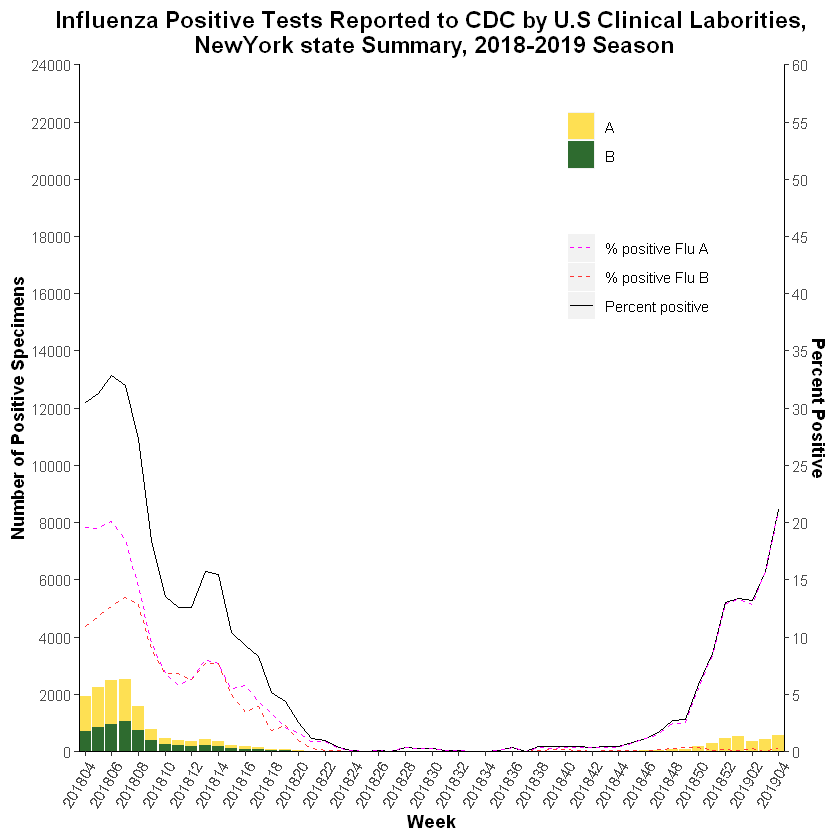

In [9]:
# Graph8

library(reshape2)
library(ggplot2)
clinicalLabs <- read.csv('Graph8.csv', skip =1)
clinicalLabs <- clinicalLabs[which((clinicalLabs$WEEK >= 4 & clinicalLabs$YEAR == 2018) | (clinicalLabs$WEEK <= 4 & clinicalLabs$YEAR == 2019)), ]

week_below_10 <-  clinicalLabs[which(clinicalLabs$WEEK < 10), ]$WEEK
week_below_10 <- paste("0", week_below_10, sep="")
clinicalLabs[which(clinicalLabs$WEEK < 10), ]$WEEK <- week_below_10
labels_X <- gsub(" ", "", paste(clinicalLabs$YEAR, clinicalLabs$WEEK), fixed = TRUE)

labels_X <- labels_X[seq(1, length(labels_X))]

clinicalLabs$XLabels = factor(labels_X, levels = labels_X)


dfm_clinical_bar <- melt(clinicalLabs[,c('XLabels', 'TOTAL.A', 'TOTAL.B', 'PERCENT.POSITIVE', 'PERCENT.A', 'PERCENT.B')],id.vars = 1)
#dfm_clinical_bar$WEEK <- factor(dfm_clinical_bar$WEEK, levels = dfm_clinical_bar[which(dfm_clinical_bar$variable == 'TOTAL.A'), ]$WEEK)
percent_positive <- dfm_clinical_bar[which(dfm_clinical_bar$variable == 'PERCENT.POSITIVE'), ]
percent_positive$value <- percent_positive$value/0.0025
percent_A <- dfm_clinical_bar[which(dfm_clinical_bar$variable == 'PERCENT.A'), ]
percent_A$value <- percent_A$value/0.0025
percent_B <- dfm_clinical_bar[which(dfm_clinical_bar$variable == 'PERCENT.B'), ]
percent_B$value <- percent_B$value/0.0025

line_data <- dfm_clinical_bar[which(dfm_clinical_bar$variable == 'PERCENT.POSITIVE' | dfm_clinical_bar$variable == 'PERCENT.A' | dfm_clinical_bar$variable == 'PERCENT.B'), ]
line_data$value <- line_data$value/ 0.0025


bar_data <- dfm_clinical_bar[which(dfm_clinical_bar$variable =='TOTAL.A' | dfm_clinical_bar$variable =='TOTAL.B'), ]

legend_labels <- c("TOTAL.A" = "A", "TOTAL.B" = "B", "PERCENT.A" = "% positive Flu A", "PERCENT.B" = "% positive Flu B", "PERCENT.POSITIVE" = "Percent positive")
bargraph_colors <- c("TOTAL.A" = "#FEE053", "TOTAL.B" = "#2E6B2F", "PERCENT.A" = "#FFFFFF", "PERCENT.B" = "#FFFFFF", "PERCENT.POSITIVE" = "#FFFFFF")
linegraph_colors <- c("TOTAL.A" = "transparent", "TOTAL.B" = "transparent", "PERCENT.B" = "#ff3333", "PERCENT.A" = "#ff00ff", "PERCENT.POSITIVE" = "#000000")
types <-  c("TOTAL.A" = "blank", "TOTAL.B" = "blank", "PERCENT.A" = "dashed", "PERCENT.B" = "dashed", "PERCENT.POSITIVE" = "solid")

ggplot(mapping = aes(x = XLabels,y = value))+ #, group = variable, fill = variable, colour=variable))+ 
geom_bar(data =bar_data, aes(fill = variable),stat = "identity")+
geom_line( data = percent_positive, aes(group = variable, colour=variable, linetype = variable))+
geom_line( data = percent_A, aes(group = variable, colour=variable, linetype = variable))+
geom_line( data = percent_B, aes(group = variable, colour=variable, linetype = variable))+

scale_color_manual(name = "", values=linegraph_colors, labels= legend_labels, guide = "legend")+
scale_fill_manual(name = "", values = bargraph_colors, labels= legend_labels, guide = "legend")+
scale_linetype_manual(name = "", values = types, labels = legend_labels, guide = "legend")+

scale_y_continuous(sec.axis = sec_axis(~.*0.0025, name = "Percent Positive", breaks = seq(0,100, by=5)),  
                   limits = c(0, 24000), breaks = seq(0,24000, by=2000), expand = c(0, 0))+
  labs(title = "Influenza Positive Tests Reported to CDC by U.S Clinical Laborities,\n NewYork state Summary, 2018-2019 Season", y = "Number of Positive Specimens", x = "Week")+
  theme(axis.line = element_line(colour = "#000000", linetype = "solid",size = 0.4),
        panel.background = element_rect(fill = 'white', colour = 'black'))+
  scale_x_discrete(breaks = levels(clinicalLabs$XLabels)[c(T, F)], expand = c(0, 0))+
  theme(axis.text.x = element_text(angle = 60, hjust = 1),
        plot.title = element_text(hjust=0.5, face="bold", size=14),
        axis.title.x = element_text(face="bold"),
        axis.title.y = element_text(face="bold"),
        legend.position = c(0.8,0.8))